In [3]:
# Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score
)

# Save model
import joblib

In [4]:
df = pd.read_csv(r"D:\Downloads\data_file.csv")
print("✅ Dataset Loaded Successfully")
df.head()

✅ Dataset Loaded Successfully


,FileName,md5Hash,Machine,DebugSize,DebugRVA,MajorImageVersion,MajorOSVersion,ExportRVA,ExportSize,IatVRA,MajorLinkerVersion,MinorLinkerVersion,NumberOfSections,SizeOfStackReserve,DllCharacteristics,ResourceSize,BitcoinAddresses,Benign
0,0124e21d-018c-4ce0-92a3-b9e205a76bc0.dll,79755c51e413ed3c6be4635fd729a6e1,332,0,0,0,4,0,0,8192,8,0,3,1048576,34112,672,0,1
1,05c8318f98a5d301d80000009c316005.vertdll.dll,95e19f3657d34a432eada93221b0ea16,34404,84,121728,10,10,126576,4930,0,14,10,8,262144,16864,1024,0,1
2,06054fba-5619-4a86-a861-ffb0464bef5d.dll,85c32641d77a54e19ba8ea4ab305c791,332,0,0,0,4,0,0,8192,8,0,3,1048576,34112,672,0,1
3,075822ac99a5d301660400009c316005.adhapi.dll,62e3b959d982ef534b66f819fe15f085,34404,84,19904,10,10,21312,252,18160,14,10,6,262144,16736,1040,0,1
4,090607dd9ba5d301ca0900009c316005.SensorsNative...,ae38c5f7d313ad0ff3bfb8826476767f,34404,84,97728,10,10,105792,1852,70592,14,10,7,262144,16736,1096,0,1


In [5]:
df.info()
df.describe()

# Check missing values
print(df.isnull().sum().sum(), "missing values found")

# Check label column (might be 'label', 'class', 'target', etc.)
print(df.columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62485 entries, 0 to 62484
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   FileName            62485 non-null  object
 1   md5Hash             62485 non-null  object
 2   Machine             62485 non-null  int64 
 3   DebugSize           62485 non-null  int64 
 4   DebugRVA            62485 non-null  int64 
 5   MajorImageVersion   62485 non-null  int64 
 6   MajorOSVersion      62485 non-null  int64 
 7   ExportRVA           62485 non-null  int64 
 8   ExportSize          62485 non-null  int64 
 9   IatVRA              62485 non-null  int64 
 10  MajorLinkerVersion  62485 non-null  int64 
 11  MinorLinkerVersion  62485 non-null  int64 
 12  NumberOfSections    62485 non-null  int64 
 13  SizeOfStackReserve  62485 non-null  int64 
 14  DllCharacteristics  62485 non-null  int64 
 15  ResourceSize        62485 non-null  int64 
 16  BitcoinAddresses    62

In [6]:
# Keep only numeric columns
# Keep only numeric columns
df = df.select_dtypes(include=[np.number])

# Replace missing values with 0
df = df.fillna(0)

# Define the correct target column manually
target_col = 'Benign'  # ✅ this is your label column

# Separate features and labels
X = df.drop(columns=[target_col])
y = df[target_col]

print("✅ Found target column:", target_col)
print("✅ Features shape:", X.shape)
print("✅ Labels shape:", y.shape)
print("✅ Label unique values:", y.unique())


✅ Found target column: Benign
✅ Features shape: (62485, 15)
✅ Labels shape: (62485,)
✅ Label unique values: [1 0]


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("✅ Training samples:", X_train.shape[0])
print("✅ Testing samples:", X_test.shape[0])


✅ Training samples: 49988
✅ Testing samples: 12497


In [8]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=200,       # number of trees
    max_depth=20,           # limit tree depth (to prevent overfitting)
    random_state=42,
    n_jobs=-1               # use all CPU cores
)

model.fit(X_train, y_train)
print("✅ Model trained successfully!")


✅ Model trained successfully!


🔹 Accuracy: 0.9965
🔹 ROC-AUC: 0.9998

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7073
           1       1.00      0.99      1.00      5424

    accuracy                           1.00     12497
   macro avg       1.00      1.00      1.00     12497
weighted avg       1.00      1.00      1.00     12497



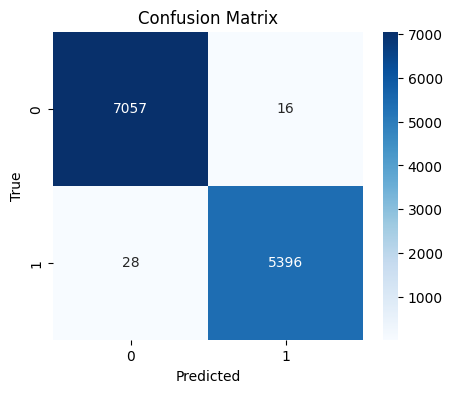

In [9]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # probability for class 1

# Metrics
print(f"🔹 Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"🔹 ROC-AUC: {roc_auc_score(y_test, y_prob):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [10]:
# Pick a random sample from test set
sample = X_test.sample(1, random_state=42)
prediction = model.predict(sample)[0]
probability = model.predict_proba(sample)[0][1]

print("\n🔍 Prediction for test sample:")
print("Prediction:", "Ransomware" if prediction == 1 else "Benign")
print(f"Confidence: {probability:.2f}")



🔍 Prediction for test sample:
Prediction: Benign
Confidence: 0.00


In [11]:
import joblib

joblib.dump(model, "ransomware_model.pkl")
print("✅ Model saved as ransomware_model.pkl")


✅ Model saved as ransomware_model.pkl


In [12]:
import joblib
import os

# Create a folder for models
os.makedirs("models", exist_ok=True)

# Save both model and feature names as a dictionary
model_data = {
    "model": model,
    "features": X.columns.tolist()
}

# Save it as one pickle file
joblib.dump(model_data, "models/ransomware_model.pkl")

print("✅ Model and feature list saved to models/ransomware_model.pkl")


✅ Model and feature list saved to models/ransomware_model.pkl


In [13]:
import joblib

# Load the saved dictionary
model_data = joblib.load("models/ransomware_model.pkl")

model = model_data["model"]
feature_names = model_data["features"]

print("✅ Model loaded successfully!")
print("🧩 Expected features:", feature_names)


✅ Model loaded successfully!
🧩 Expected features: ['Machine', 'DebugSize', 'DebugRVA', 'MajorImageVersion', 'MajorOSVersion', 'ExportRVA', 'ExportSize', 'IatVRA', 'MajorLinkerVersion', 'MinorLinkerVersion', 'NumberOfSections', 'SizeOfStackReserve', 'DllCharacteristics', 'ResourceSize', 'BitcoinAddresses']


In [15]:
uploaded_data = pd.read_csv(uploaded_file)

# Ensure same column order
uploaded_data = uploaded_data[feature_names]

# Predict
preds = model.predict(uploaded_data)


NameError: name 'uploaded_file' is not defined